# **Lab 1.1 Image Representation**

In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Image Color Order with different libraries**
In this part, you will explore how different libraries interpret and display image colors. Specifically, you will compare Matplotlib and OpenCV libraries for image loading and display.

**Load and Display Images:**
   - Load an image using both Matplotlib `plt.imread()` and OpenCV `cv2.imread()` libraries.
   - Display the images side by side using Matplotlib.

**HINT** : `plt.imread()`,`cv2.imread()`,`fig, axs = plt.subplots(1, 2)`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-1.png)


</details>

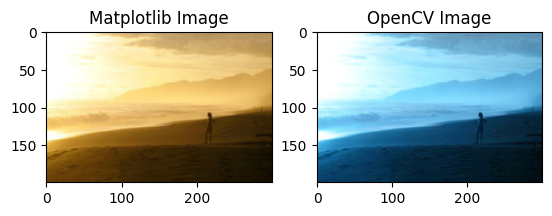

In [2]:
### START CODE HERE ###

mpl_img = plt.imread("image/images.jpg")
cv_img = cv2.imread("image/images.jpg")
fig, axs = plt.subplots(1,2)

axs[0].imshow(mpl_img)
axs[1].imshow(cv_img)

axs[0].set_title("Matplotlib Image")
axs[1].set_title("OpenCV Image")


plt.show()
### END CODE HERE ###

### Opencv [BGR] vs Matplotlib [RGB]
Examine the grayscale representations of individual color channels for each library.
***PLEASE use direct slicing method***

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-2.png)

</details>

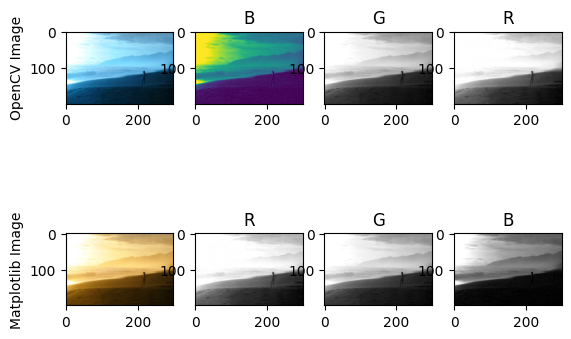

In [9]:
### START CODE HERE ###
fig, axs = plt.subplots(2,4)
axs[0][0].imshow(cv_img)
axs[1][0].imshow(mpl_img)
axs[0][1].imshow(cv_img[:,:,0], cmap='gray')
axs[0][1].set_title("B")
axs[0][2].imshow(cv_img[:,:,1], cmap='gray')
axs[0][2].set_title("G")
axs[0][3].imshow(cv_img[:,:,2], cmap='gray')
axs[0][3].set_title("R")

axs[1][1].imshow(mpl_img[:,:,0], cmap='gray')
axs[1][1].set_title("R")

axs[1][2].imshow(mpl_img[:,:,1], cmap='gray')
axs[1][2].set_title("G")

axs[1][3].imshow(mpl_img[:,:,2], cmap='gray')
axs[1][3].set_title("B")

axs[0][0].set_ylabel("OpenCV Image")
axs[1][0].set_ylabel("Matplotlib Image")

plt.show()
### END CODE HERE ###

##### Opencv BGR -> RGB
Compare the images displayed after conversion using both methods (`cv2.cvtColor()` and `direct slicing`).

Use `cv2.cvtColor()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-3.png)

</details>

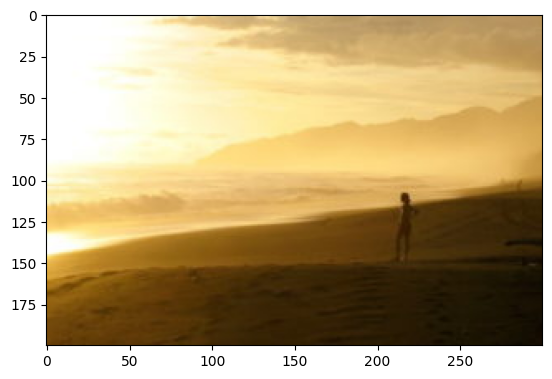

In [5]:
### START CODE HERE ###
rgb_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR)
plt.imshow(rgb_img)
plt.show()
### END CODE HERE ###

Use `direct slicing method (array[...])`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-4.png)

</details>

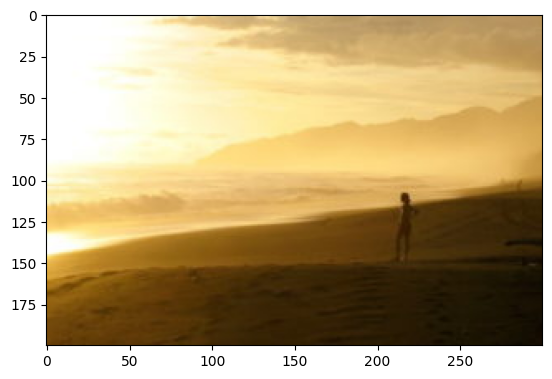

In [6]:
### START CODE HERE ###
img = cv_img[:, :, ::-1] # คง Row COLUMN เดิมไว้ แต่นับ Channel สี ถอยหลัง#::-1 =>start,stop,step
plt.imshow(img)
plt.show()

### END CODE HERE ###

## **Image Reshape**

Implement the code to tranform the image from ***channels last (HWC) to channels first (CHW)***.<br>

**NumPy Transpose**<br>
Compare the difference between :
- `np.transpose(<img>)`
- `np.transpose(<img>,(2,0,1))`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
np.transpose(mpl_img) => Before : (3265, 4898, 3) | After : (3, 4898, 3265)
np.transpose(mpl_img,(2,0,1)) => Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-5.png)

</details>

np.transpose(mpl_img) => Before : (200, 300, 3) | After : (3, 300, 200)
np.transpose(mpl_img,(2,0,1)) => Before : (200, 300, 3) | After : (3, 200, 300)


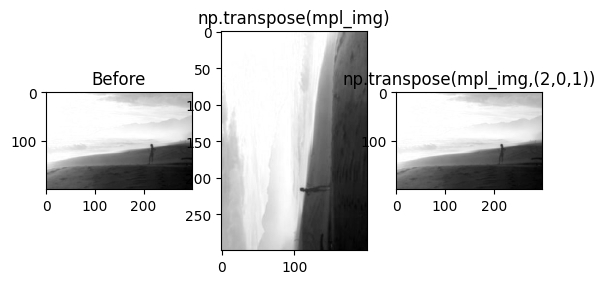

In [11]:
### START CODE HERE ###

#สลับ w,h,c
reshaped_trade_trans = np.transpose(mpl_img)
print('np.transpose(mpl_img) => Before :',mpl_img.shape,'| After :',reshaped_trade_trans.shape)


#สลับ c,h,w
reshaped_trans = np.transpose(mpl_img,(2,0,1))
print('np.transpose(mpl_img,(2,0,1)) => Before :',mpl_img.shape,'| After :',reshaped_trans.shape)


fig, axs = plt.subplots(1,3)

# axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title("Before")

# axs[1].imshow(reshaped_trade_trans[:,:,0], cmap='gray')
axs[1].imshow(reshaped_trade_trans[0,:,:], cmap='gray')
axs[1].set_title("np.transpose(mpl_img)")

axs[2].imshow(reshaped_trans[0,:,:], cmap='gray')
axs[2].set_title("np.transpose(mpl_img,(2,0,1))")

# axs[1].set_title("Before")

plt.show()





### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [12]:
assert reshaped_trade_trans.shape == (mpl_img.shape[2], mpl_img.shape[1], mpl_img.shape[0]), \
    f"Error: Shape mismatch after traditional transpose. Expected {(mpl_img.shape[1], mpl_img.shape[0], mpl_img.shape[2])}, got {reshaped_trade_trans.shape}"
print("Assertion for traditional transpose passed successfully.")

assert reshaped_trans.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after specified transpose. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_trans.shape}"
print("Assertion for specified transpose passed successfully.")

Assertion for traditional transpose passed successfully.
Assertion for specified transpose passed successfully.


**NumPy Reshape**

Use `np.reshape()`. Ensure the new shape is (3, height, width).
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-6.png)

</details>

Before : (200, 300, 3) | After : (3, 200, 300)


Text(0.5, 1.0, 'np.reshape(mpl_img,((3,200,300))')

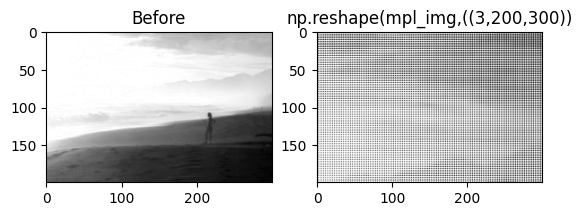

In [13]:
### START CODE HERE ###
reshaped_reshape = np.reshape(mpl_img,((3,200,300)))
print('Before :',mpl_img.shape,'| After :',reshaped_reshape.shape)

fig, axs = plt.subplots(1,2)

# axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title("Before")
axs[1].imshow(reshaped_reshape[0,:,:], cmap='gray')
axs[1].set_title("np.reshape(mpl_img,((3,200,300))")





### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [11]:
assert reshaped_reshape.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after reshape. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_reshape.shape}"
print("Assertion for reshape passed successfully.")

Assertion for reshape passed successfully.


**NumPy moveaxis**

Use `np.moveaxis` to move the channels axis from the last position to the first.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-7.png)

</details>

(200, 300, 3)
(3, 200, 300)


Text(0.5, 1.0, 'Before')

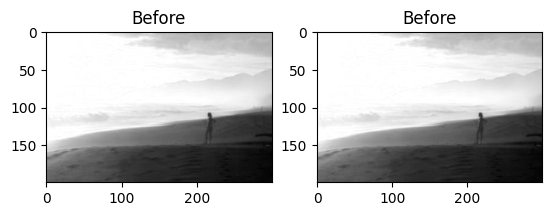

In [16]:
### START CODE HERE ###
reshaped_mvx = np.moveaxis(mpl_img,0,-1)
reshaped_mvx = np.moveaxis(reshaped_mvx,0,-1)
print(mpl_img.shape)
print(reshaped_mvx.shape)
fig, axs = plt.subplots(1,2)

# axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title("Before")
axs[1].imshow(reshaped_mvx[0,:,:], cmap='gray')
axs[1].set_title("Before")





### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [13]:
assert reshaped_mvx.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after np.moveaxis. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_mvx.shape}"
print("Assertion for np.moveaxis passed successfully.")

Assertion for np.moveaxis passed successfully.


## **Reduce Bit Depth using Quantization**
In this part, you will explore how to reduce the bit depth of an image using quantization. Quantization is a technique used to map pixel values from a continuous range to a smaller set of discrete values, effectively reducing the number of bits used to represent each pixel.
$$
\begin{align*}
Q_{level} &= 2^{bit dept-1}\\
Q &= floor(NormValue(S_i) * Q_{level})\\
Q &= floor((\frac{S_i-S_{min}}{S_{max}-S_{min}})*Q_{level})
\end{align*}
$$

Please complete the function below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/1-8.png)

</details>

In [29]:
### START CODE HERE ###
def quantize(img,bit_dept):
    q_level = math.pow(2,bit_dept-1)
    norm_value = ((img-0)/255-0)
    q = np.floor(norm_value * q_level) 
    return q
    
### END CODE HERE ###

(200, 300)
(200, 300)


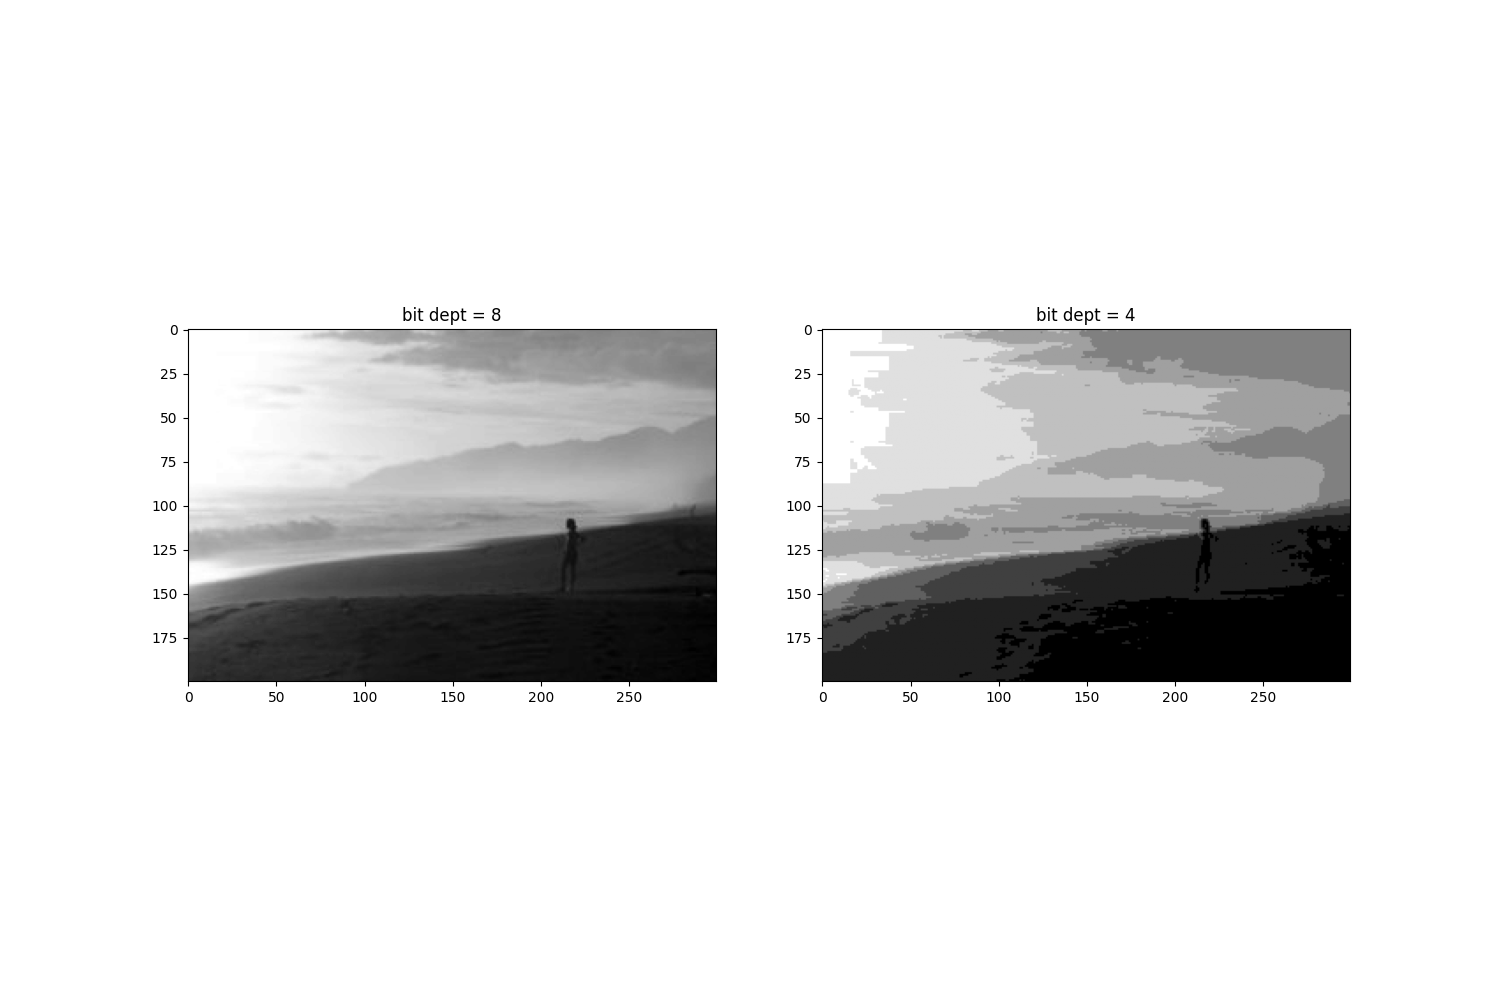

In [30]:
### START CODE HERE ###
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)
bd8 = quantize(gray_img,8)
bd4 = quantize(gray_img,4)
print(bd8.shape)
print(bd4.shape)

fig, axs = plt.subplots(1,2, figsize=(15, 10))

# axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].imshow(bd8, cmap='gray')
axs[0].set_title("bit dept = 8")
axs[1].imshow(bd4, cmap='gray')
axs[1].set_title("bit dept = 4")

plt.show()

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [25]:
max_value_bd8 = 2**8 - 1
max_value_bd4 = 2**4 - 1

assert np.min(bd8) >= 0 and np.max(bd8) <= max_value_bd8, \
    f"Error: Values in bd8 are out of expected range 0-{max_value_bd8}. Got min={np.min(bd8)}, max={np.max(bd8)}"
assert np.min(bd4) >= 0 and np.max(bd4) <= max_value_bd4, \
    f"Error: Values in bd4 are out of expected range 0-{max_value_bd4}. Got min={np.min(bd4)}, max={np.max(bd4)}"


## **3D Image Surface**

use `plot_surface()` to plot the image in 3D space, where the z-axis represents the normalized pixel intensity values.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![3d-surface.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/3d-surface.gif)

</details>

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

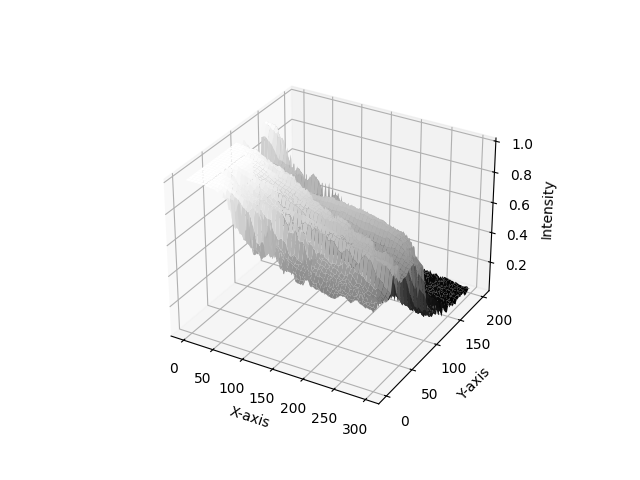

In [26]:
%matplotlib ipympl 
### START CODE HERE ###
cv_img_gray = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)
norm_value = ((cv_img_gray-0)/255-0)
# print(cv_img_gray.shape)
# print(rows)
x = np.arange(0,300)
print(x)
y = np.arange(0,200)
print(y)
X, Y = np.meshgrid(x, y)

#หรือใช้วัดขนาดจากภาพเอาเลย
# rows = cv_img_gray.shape[0]
# cols = cv_img_gray.shape[1]
# x = np.arange(cols)
# y = np.arange(rows)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, norm_value, cmap='gray')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Intensity')

plt.show()
### END CODE HERE ###


---

## **Question**
1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?
2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?
3. Why does np.reshape destroy the image integrity?